# Dermatology Classification #

**Instructions:**

Aim for this project is to determine the type of Eryhemato-Squamous Disease.

You'll use the <a href="http://archive.ics.uci.edu/ml/datasets/Dermatology">Dermatology Dataset</a> from the UCI Machine Learning Repository. 

There are 34 features. The family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

There are 6 classes (disease types) denoted in the last column. You can download the dataset as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


url = "http://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
df = pd.read_csv(url, header=None)

First, you need to understand and preprocess the data. You need to handle if there is any missing data. All attributes should be converted to numerical values to be fed into ML algorithms. Then, you will apply machine learning models to make classification and compare them with proper metrics.


You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc. To increase your grade you can add add more eloboration such as using ensembling or exploiting feature selection/extraction techniques.

# Data Preprocessing

## Renaming Column Names

Renaming column names based on the names mentioned in UCI dataset webpage for better understanding

In [3]:
column_names = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 
                'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence',
                'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 
                'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges',
                'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 
                'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes',
                'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate',  'Age', 'target']

df.columns = column_names 

In [4]:
df.head() # head displays first five rows of the data set.

erythema  scaling  definite borders  itching  koebner phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal papules  follicular papules  oral mucosal involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee and elbow involvement  scalp involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance of the granular layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation and damage of basal layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth appearance of retes  follicular horn plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular parakeratosis  inflammatory monoluclear inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like infiltrate  Age  target  
0                     0   55       2  
1                     0    8       1  
2                     3   26       3  
3                     0   40       1  
4                     3   45       3  

[5 rows x 35 columns]

In [5]:
df.shape

(366, 35)

In [6]:
df.describe()

erythema     scaling  definite borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner phenomenon  polygonal papules  follicular papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral mucosal involvement  knee and elbow involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp involvement  ...  focal hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance of the granular layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation and damage of basal layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth appearance of retes  follicular horn plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular parakeratosis  inflammatory monoluclear inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

In [7]:
df.dtypes #checking the datatype of all column in data frame

erythema                                     int64
scaling                                      int64
definite borders                             int64
itching                                      int64
koebner phenomenon                           int64
polygonal papules                            int64
follicular papules                           int64
oral mucosal involvement                     int64
knee and elbow involvement                   int64
scalp involvement                            int64
family history                               int64
melanin incontinence                         int64
eosinophils in the infiltrate                int64
PNL infiltrate                               int64
fibrosis of the papillary dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing of the rete ridges    

## Handling missing data

Looking for missing values in the dataset

In [8]:
missing_values_age=df[df['Age'].str.find('?') != -1] #we have a special character ('?') in Age which is missing value in the dataset.

In [9]:
missing_values_age

erythema  scaling  definite borders  itching  koebner phenomenon  \
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
33                   0                   0                         0   
34                   0                   0                         0   
35                   0                   0                         0   
36                   3                   0                         2   
262                  0                   0                         0   
263                  0                   0                         0   
264                  0                   0                         0   
265                  0                   0                         0   

     knee and elbow involvement  scalp involvement  ...  \
33                            1                  0  ...   
34                            0                  0  ...   
35                            0                  0  ...   
36                            0                  0  ...   
262                           0                  0  ...   
263                           0                  0  ...   
264                           1                  0  ...   
265                           0                  0  ...   

     disappearance of the granular layer  \
33                                     0   
34                                     0   
35                                     0   
36                                     0   
262                                    0   
263                                    0   
264                                    0   
265                                    0   

     vacuolisation and damage of basal layer  spongiosis  \
33                                         0           0   
34                                         0           0   
35                                         0           0   
36                                         2           0   
262                                        0           2   
263                                        0           3   
264                                        0           2   
265                                        0           2   

     saw-tooth appearance of retes  follicular horn plug  \
33                               0                     0   
34                               0                     0   
35                               0                     0   
36                               2                     0   
262                              0                     0   
263                              0                     0   
264                              0                     0   
265                              0                     0   

     perifollicular parakeratosis  inflammatory monoluclear inflitrate  \
33                              0                                    0   
34                              0                                    0   
35                              0                                    0   
36                              0                                    0   
262                             0                                    3   
263                             0                                    2   
264                             0                                    3   
265                             0                                    3   

     band-like infil

In [10]:
null_indices_of_age = df['Age'][df['Age'].str.find('?') != -1].index
non_missing_df = df.drop(index=null_indices_of_age)
non_missing_df.head()

erythema  scaling  definite borders  itching  koebner phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal papules  follicular papules  oral mucosal involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee and elbow involvement  scalp involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance of the granular layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation and damage of basal layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth appearance of retes  follicular horn plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular parakeratosis  inflammatory monoluclear inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like infiltrate  Age  target  
0                     0   55       2  
1                     0    8       1  
2                     3   26       3  
3                     0   40       1  
4                     3   45       3  

[5 rows x 35 columns]

In [11]:
X= non_missing_df.drop('Age',axis=1)
y= non_missing_df['Age']

In [12]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [13]:
X_test= missing_values_age.drop(['Age'],axis=1)

In [14]:
missing_age_prediction=regr.predict(X_test)
missing_age_prediction

array([36.9183245 , 36.32517473, 37.02131289, 37.6958658 , 37.37269872,
       36.88614991, 37.67945117, 36.60904357])

In [15]:
filling_missing_values = X_test.assign(Age=missing_age_prediction).astype(int)

In [16]:
filling_missing_values

erythema  scaling  definite borders  itching  koebner phenomenon  \
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
33                   0                   0                         0   
34                   0                   0                         0   
35                   0                   0                         0   
36                   3                   0                         2   
262                  0                   0                         0   
263                  0                   0                         0   
264                  0                   0                         0   
265                  0                   0                         0   

     knee and elbow involvement  scalp involvement  ...  \
33                            1                  0  ...   
34                            0                  0  ...   
35                            0                  0  ...   
36                            0                  0  ...   
262                           0                  0  ...   
263                           0                  0  ...   
264                           1                  0  ...   
265                           0                  0  ...   

     disappearance of the granular layer  \
33                                     0   
34                                     0   
35                                     0   
36                                     0   
262                                    0   
263                                    0   
264                                    0   
265                                    0   

     vacuolisation and damage of basal layer  spongiosis  \
33                                         0           0   
34                                         0           0   
35                                         0           0   
36                                         2           0   
262                                        0           2   
263                                        0           3   
264                                        0           2   
265                                        0           2   

     saw-tooth appearance of retes  follicular horn plug  \
33                               0                     0   
34                               0                     0   
35                               0                     0   
36                               2                     0   
262                              0                     0   
263                              0                     0   
264                              0                     0   
265                              0                     0   

     perifollicular parakeratosis  inflammatory monoluclear inflitrate  \
33                              0                                    0   
34                              0                                    0   
35                              0                                    0   
36                              0                                    0   
262                             0                                    3   
263                             0                                    2   
264                             0                                    3   
265                             0                                    3   

     band-like infil

Rearraging Age in the dataframe for ease in merging.

In [17]:
filling_missing_values=filling_missing_values[['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate','Age','target']]

Contenation helps in joining two data frame or series horizontally.

In [18]:
new_derma_df= pd.concat([non_missing_df,filling_missing_values]) # concatenated the the two data frame
new_derma_df.to_csv('dermatology.csv',index=False) #saving the dataframe into csv file dermatology.csv

##Reading the newly created dataset

In [19]:
new_df= pd.read_csv('/content/dermatology.csv')
new_df.head()  #top 5 rows of data

erythema  scaling  definite borders  itching  koebner phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal papules  follicular papules  oral mucosal involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee and elbow involvement  scalp involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance of the granular layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation and damage of basal layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth appearance of retes  follicular horn plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular parakeratosis  inflammatory monoluclear inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like infiltrate  Age  target  
0                     0   55       2  
1                     0    8       1  
2                     3   26       3  
3                     0   40       1  
4                     3   45       3  

[5 rows x 35 columns]

In [20]:
print("Perecentage of each clasification available in the target \n",new_df.target.value_counts()/len(new_df)*100)

Perecentage of each clasification available in the target 
 1    30.601093
3    19.672131
2    16.666667
5    14.207650
4    13.387978
6     5.464481
Name: target, dtype: float64


## Exploratory Data Analysis

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. 

Here, 

0 indicates that the feature was not present, 

3 indicates the largest amount possible, and 

1, 2 indicate the relative intermediate values.

## Univariate Analysis

In [21]:
def bar_plot(dataframe,column):
  dataframe['column'].value_counts().plot.bar()

  plt.title('column')

  return plt.show()


**Erythema**

According to NHS, Erythema multiforme is a skin reaction that can be triggered by an infection or some medicines. It's usually mild and goes away in a few weeks.

Picture:

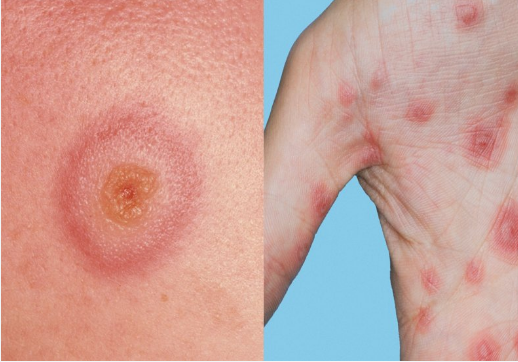

Link: https://www.nhs.uk/conditions/erythema-multiforme/

Erythema 
 2    58.743169
3    24.590164
1    15.573770
0     1.092896
Name: erythema, dtype: float64


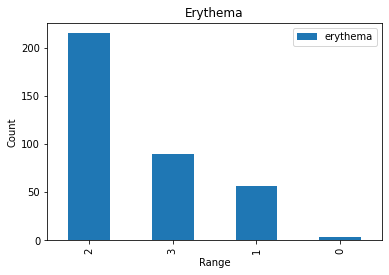

In [22]:
print('Erythema \n',new_df['erythema'].value_counts()/len(new_df)*100)
new_df['erythema'].value_counts().plot.bar()
plt.title('Erythema')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Erthema.

According to Data,

- Around 59% of the patients in the data have intermediate level if Erythma.

- Around 25% have severe Erythmatic condition.

- Around 1% have no Erthma on the skin.

**Scaling**

According to medical news today, Scaling skin is dry, cracked, or flaky skin. Also known as desquamation, scaling skin happens when the outer layer of the skin, called the epidermis, begins to flake off.

For Example: Psoriasis, Eczema 

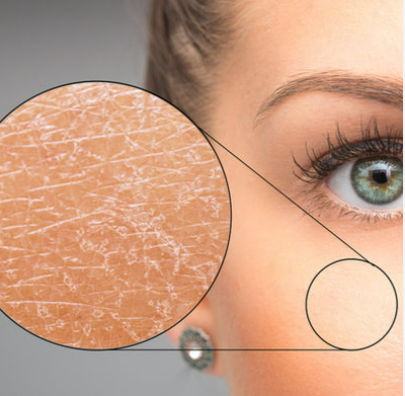



Link: https://www.medicalnewstoday.com/articles/323967



Scaling 
 2    53.278689
1    30.327869
3    14.207650
0     2.185792
Name: scaling, dtype: float64


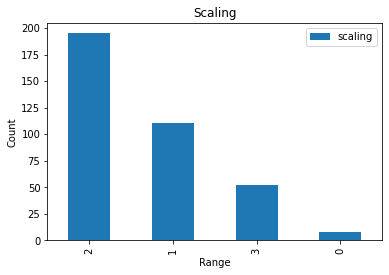

In [23]:
print('Scaling \n',new_df['scaling'].value_counts()/len(new_df)*100)
new_df['scaling'].value_counts().plot.bar()
plt.title('Scaling')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Scaling disorder.

According to Data,

- Around 53% of the patients in the data have intermediate level if Scaling disorder on the skin.

- Around 14% have severe Scaling disorder condition.

- Around 1% have no Scaling disorder on the skin.

In [24]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')

**Definite Borders**

Definite Borders are diagonized by Plaques are just one of the several types of primary lesions that indicate a skin disease. Plaques can be a bit of a challenge to diagnose because there are several skin conditions that can cause plaques, but there are some unique findings that can help in telling these rashes apart.

For example, seborrheic dermatitis plaques are scaly, itchy, red and typically found on oily parts of the body, including the face and chest. Pityriasis rosea plaques begin with one herald patch and spread. The plaques also resemble drooping tree branches.

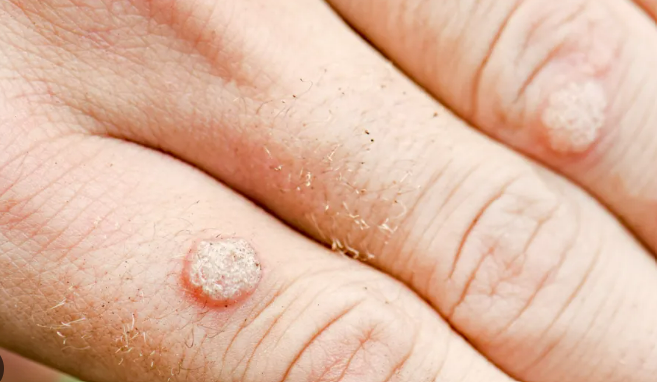





Link : https://www.verywellhealth.com/understanding-plaque-1069366

Definite borders 
 2    45.901639
1    25.409836
0    16.120219
3    12.568306
Name: definite borders, dtype: float64


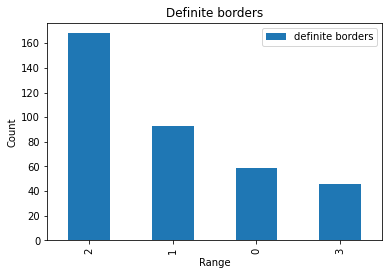

In [25]:
print('Definite borders \n',new_df['definite borders'].value_counts()/len(new_df)*100)
new_df['definite borders'].value_counts().plot.bar()
plt.title('Definite borders')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Definite Border/ Plaques.

According to Data,

- Around 46% of the patients in the data have intermediate level if Plaques on the skin.

- Around 12% have severe Plaques condition.

- Around 16% have no Plaques on the skin.

**Itching**

Itchy skin, also known as pruritus, is an irritating and uncontrollable sensation that makes you want to scratch to relieve the feeling. The possible causes for itchiness include internal illnesses and skin conditions.


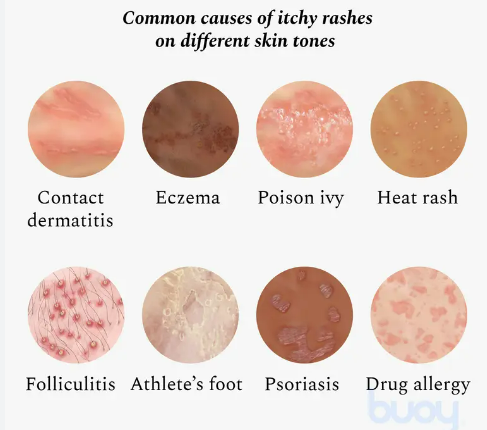



Link: https://www.healthline.com/health/itching#causes

Itching 
 0    32.240437
2    27.322404
3    20.765027
1    19.672131
Name: itching, dtype: float64


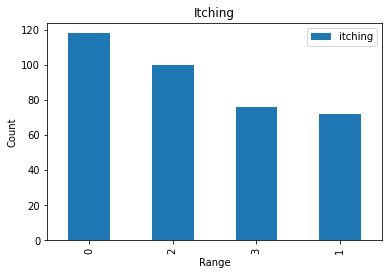

In [26]:
print('Itching \n',new_df['itching'].value_counts()/len(new_df)*100)
new_df['itching'].value_counts().plot.bar()
plt.title('Itching')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Itching.

According to Data,

- Around 32% of the patients in the data have no itchiness on the skin.

- Around 21% have severe itchy condition.

- Around 27% have intermediate itchiness on the skin.

**Koebner phenomenon**

Koebner phenomenon affects people with certain skin diseases, most often with psoriasis. Sometimes, it can happen to people with warts, vitiligo and lichen planus. An injury, wound or burn can cause new lesions that resemble the primary skin disease.


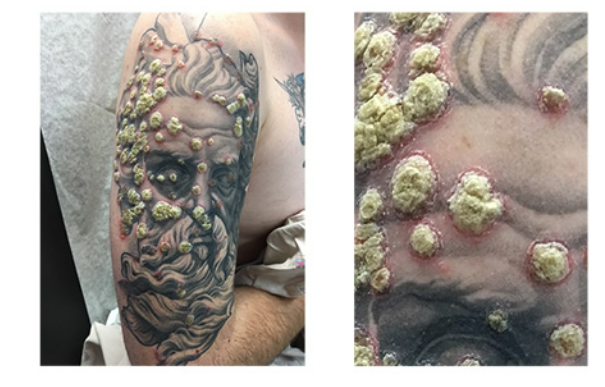

Link: https://my.clevelandclinic.org/health/diseases/22860-koebner-phenomenon

Koebner phenomenon 
 0    61.202186
1    19.125683
2    14.754098
3     4.918033
Name: koebner phenomenon, dtype: float64


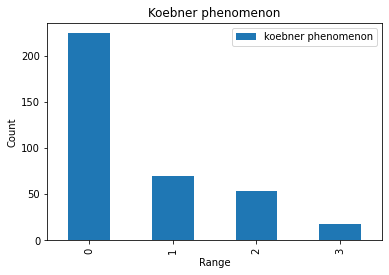

In [27]:
print('Koebner phenomenon \n',new_df['koebner phenomenon'].value_counts()/len(new_df)*100)
new_df['koebner phenomenon'].value_counts().plot.bar()
plt.title('Koebner phenomenon')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Koebner phenomenon.

According to Data,

- Around 61% of the patients in the data have no Koebner phenomenon on the skin.

- Around 5% have severe Koebner phenomenon condition.

- Around 27% have intermediate Koebner phenomenon on the skin.

**Polygonal papules**

Papules and polygonal plaques are shiny, flat-topped, and firm on palpation. The plaques are crossed by fine white lines called Wickham striae. Hypertrophic lichen planus can be a scaly and pruritic rash. Atrophic lichen planus is a rare annular variant with an atrophic centre.
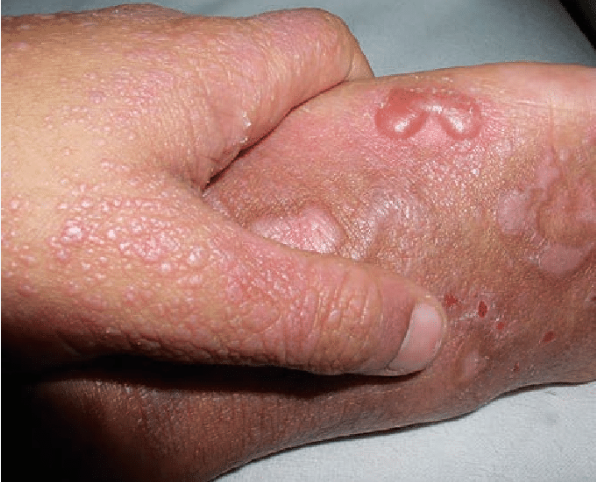

Link: https://dermnetnz.org/topics/lichen-planus#:~:text=Papules%20and%20polygonal%20plaques%20are,variant%20with%20an%20atrophic%20centre.

Polygonal papules 
 0    81.147541
2    11.202186
3     7.377049
1     0.273224
Name: polygonal papules, dtype: float64


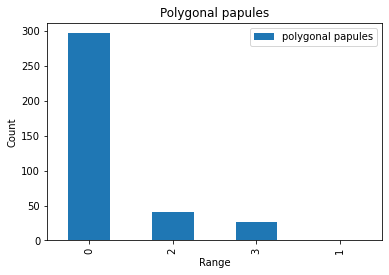

In [28]:

print('Polygonal papules \n',new_df['polygonal papules'].value_counts()/len(new_df)*100)
new_df['polygonal papules'].value_counts().plot.bar()
plt.title('Polygonal papules')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Polygonal papules.

According to Data,

- Around 81% of the patients in the data have no Polygonal papules on the skin.

- Around 7% have severe Koebner phenomenon condition.

- Around 11% have intermediate Koebner phenomenon on the skin.

**Follicular papules**

A follicular papule occurs when the inflammatory infiltrate accumulates within the epidermis of the follicle or in the perifollicular dermis.
Follicular eczema is the form of a common skin condition — atopic dermatitis — with reactions that occur in the hair follicle. Atopic dermatitis occurs when your skin's outer layer is unable to protect you from external threats, such as allergens, bacteria, or other irritants.

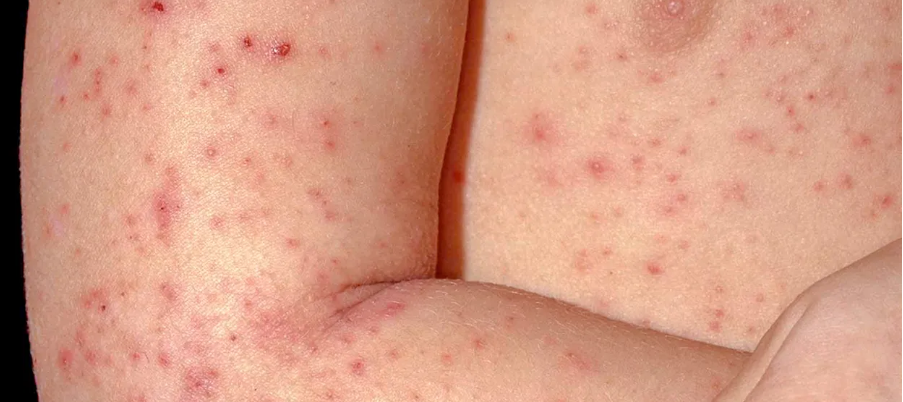


Link: https://www.healthline.com/health/follicular-eczema#overview

Follicular papules 
 0    90.983607
2     4.371585
1     3.005464
3     1.639344
Name: follicular papules, dtype: float64


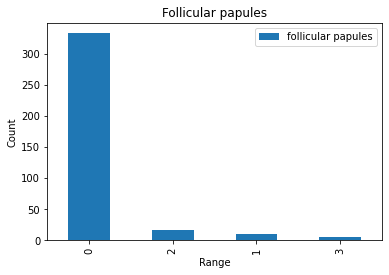

In [29]:
print('Follicular papules \n',new_df['follicular papules'].value_counts()/len(new_df)*100)
new_df['follicular papules'].value_counts().plot.bar()
plt.title('Follicular papules')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Follicular papules.

According to Data,

- Around 91% of the patients in the data have no Follicular papules on the skin.

- Around 2% have severe Follicular papules condition.

- Around 4% have intermediate Follicular papules on the skin.

In [30]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')

**Oral mucosal involvement**

Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone. Many reports exist about the misdiagnosis of this disease. Various symptoms may lead the clinician to an incorrect diagnosis, especially with multiple organ involvement.
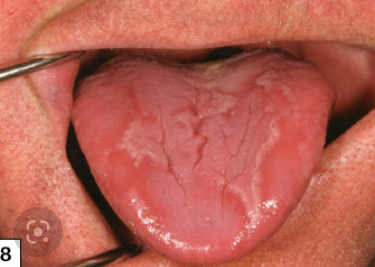

Link: https://pubmed.ncbi.nlm.nih.gov/22126355/#:~:text=Oral%20involvement%20generally%20consists%20of,especially%20with%20multiple%20organ%20involvement.

Oral mucosal involvement 
 0    81.693989
2    12.295082
3     3.551913
1     2.459016
Name: oral mucosal involvement, dtype: float64


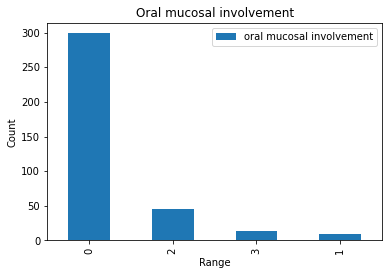

In [31]:
print('Oral mucosal involvement \n',new_df['oral mucosal involvement'].value_counts()/len(new_df)*100)
new_df['oral mucosal involvement'].value_counts().plot.bar()
plt.title('Oral mucosal involvement')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in Oral mucosal involvement.

According to Data,

- Around 82% of the patients in the data have no Oral mucosal involvement on the skin.

- Around 4% have severe Oral mucosal involvement condition.

- Around 12% have intermediate Oral mucosal involvement on the skin.

**knee and elbow involvement**

Dermatitis herpetiformis (DH) is a vesicobullous eruption that appears on the elbows, knees, buttocks, neck, and scalp, and less commonly on the upper back, abdomen, groin, and face.1 The main symptoms are severe itch, followed by small blisters resembling those caused by herpes simplex virus. They are often scratched, creating eroded and crusted secondary lesions, resembling the cutaneous lesions of excoriated prurigo. The appearance of vesicobullous eruptions and excoriated prurigo–like eruptions can delay the diagnosis of DH for several months or years. Even less common, DH can cutaneously manifest urticarial papules2 or purpuric or petechial lesions on the hands and feet.

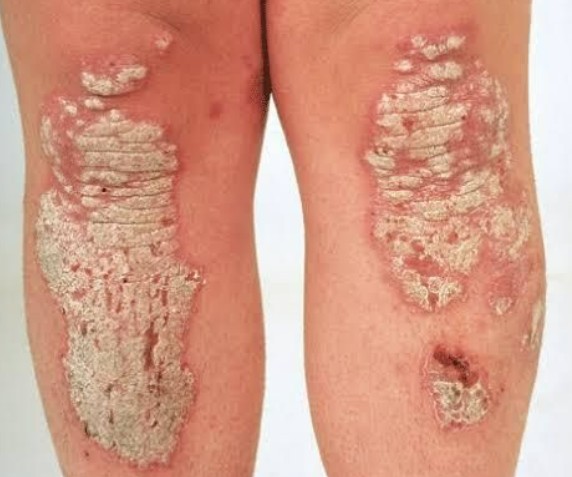

Link : https://www.verywellhealth.com/extensor-surface-1069321

knee and elbow involvement 
 0    68.579235
2    17.486339
1     7.650273
3     6.284153
Name: knee and elbow involvement, dtype: float64


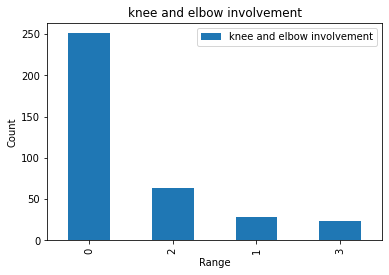

In [32]:
print('knee and elbow involvement \n',new_df['knee and elbow involvement'].value_counts()/len(new_df)*100)
new_df['knee and elbow involvement'].value_counts().plot.bar()
plt.title('knee and elbow involvement')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in knee and elbow involvement.

According to Data,

- Around 69% of the patients in the data have no knee and elbow involvement on the skin.

- Around 6% have severe knee and elbow involvement involvement condition.

- Around 12% have intermediate knee and elbow involvement involvement on the skin.

**scalp involvement**

Scalp Dermatomyositis needs to be considered in all patients 50 and over with scalp itching, burning and symptoms together with redness. Scalp dermatomyositis does not always give hair loss but about 30-40 % of the time it does. The scalp symptoms can be troublesome to patients.


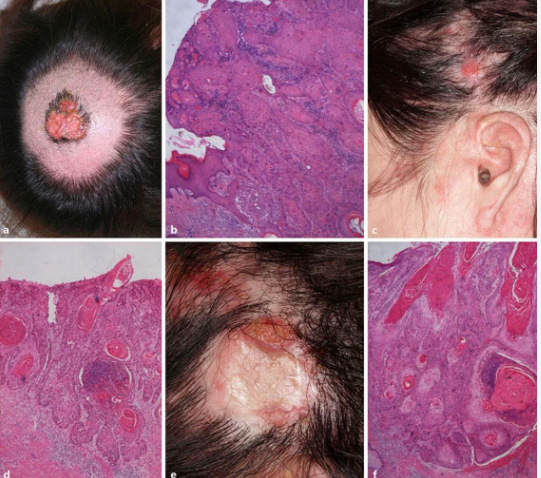

Link:https://donovanmedical.com/hair-blog/dm-scalp#:~:text=Scalp%20Dermatomyositis%20needs%20to%20be,can%20be%20troublesome%20to%20patients.




scalp involvement 
 0    72.131148
2    15.300546
1     8.196721
3     4.371585
Name: scalp involvement, dtype: float64


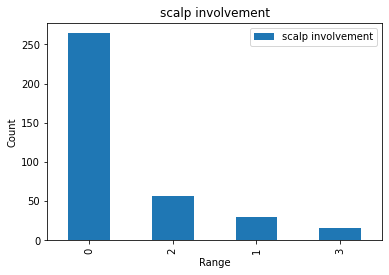

In [33]:
print('scalp involvement \n',new_df['scalp involvement'].value_counts()/len(new_df)*100)
new_df['scalp involvement'].value_counts().plot.bar()
plt.title('scalp involvement')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values in scalp involvement .

According to Data,

- Around 72% of the patients in the data have no scalp involvement on the skin.

- Around 4% have severe scalp involvement on the skin.

- Around 15% have intermediate scalp involvement on the skin.

**family history**

The impact of skin disease on patients' health-related quality of life (HRQoL) is well known, little work has been carried out to determine the secondary impact of a patient's skin disease on the patient's family or partner.

Link: https://pubmed.ncbi.nlm.nih.gov/17381458/


family history 
 0    87.431694
1    12.568306
Name: family history, dtype: float64


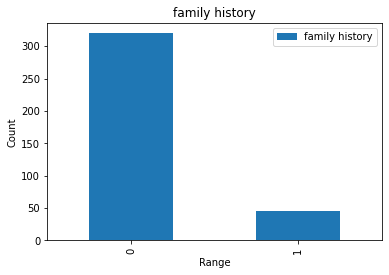

In [34]:
print('family history \n',new_df['family history'].value_counts()/len(new_df)*100)
new_df['family history'].value_counts().plot.bar()
plt.title('family history')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values infamily history.

According to Data,

- Around 87% of the patients in the data have no family history.

- Around 12% have family history.


In [35]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')


**Melanin incontinence** 

Melanin incontinence (pigmentary incontinence) is the presence of melanin in the superficial dermis, due to the loss of melanin from damaged cells of the basal layer.

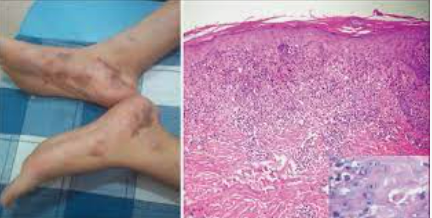



Link: https://www.sciencedirect.com/topics/medicine-and-dentistry/melanin#:~:text=Melanin%20incontinence%20(pigmentary%20incontinence)%20is,cells%20of%20the%20basal%20layer.

Melanin incontinence 
 0    80.874317
2    12.568306
3     4.371585
1     2.185792
Name: melanin incontinence, dtype: float64


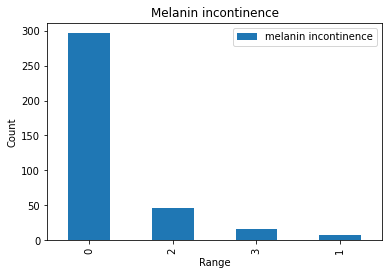

In [36]:
print('Melanin incontinence \n',new_df['melanin incontinence'].value_counts()/len(new_df)*100)
new_df['melanin incontinence'].value_counts().plot.bar()
plt.title('Melanin incontinence')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Melanin incontinence .

According to Data,

- Around 81% of the patients in the data have no Melanin incontinence on the skin.

- Around 4% have Melanin incontinence  on the skin.

- Around 13% have intermediate Melanin incontinence  on the skin.


Eosinophils in the infiltrate

Eosinophilic disorder is a general term for any disorder characterized by infiltration of the skin and tissue by a certain type of white blood cell called eosinophils, including disease resulting from arthropod bites, infections, and drug reactions.

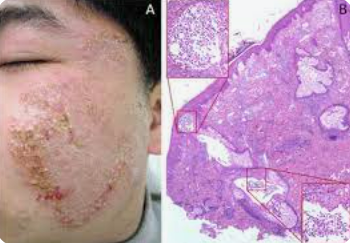

Links:https://rarediseases.org/rare-diseases/eosinophilic-fasciitis/#:~:text=Eosinophilic%20disorder%20is%20a%20general,%2C%20infections%2C%20and%20drug%20reactions.

Eosinophils in the infiltrate 
 0    88.524590
1     9.016393
2     2.459016
Name: eosinophils in the infiltrate, dtype: float64


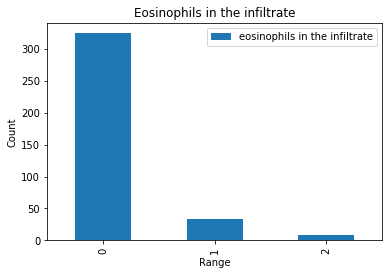

In [37]:
print('Eosinophils in the infiltrate \n',new_df['eosinophils in the infiltrate'].value_counts()/len(new_df)*100)
new_df['eosinophils in the infiltrate'].value_counts().plot.bar()
plt.title('Eosinophils in the infiltrate')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values eosinophils in the infiltrate.

According to Data,

- Around 88% of the patients in the data have no eosinophils in the infiltrate on the skin.

- Around 2% have intermediate eosinophils in the infiltrate on the skin.

PNL infiltrate

PNL is a mononeuritis (single nerve involvement) which occurs in about 60% of the cases.3 When more than one nerve is involved in an asymmetrical distribution it is known as mononeuritis multiplex, while symmetric involvement is called polyneuropathy or symmetrical polyneuritis. Nerves in the upper limbs (ulnar, radial cutaneous) are involved more often, and temperature and pain sensation are the first to be affected, but the patient may complain of sensory and/or motor impairment,numbness,parasthesiae and neural pain.

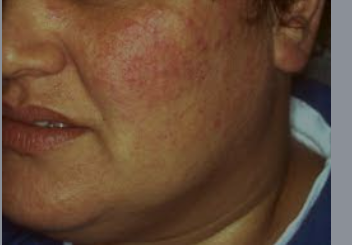


Link: https://leprosyreview.org/admin/public/api/lepra/website/getDownload/5f5122312bea3019717a7cf4





PNL infiltrate
 0    64.207650
1    18.852459
2    15.027322
3     1.912568
Name: PNL infiltrate, dtype: float64


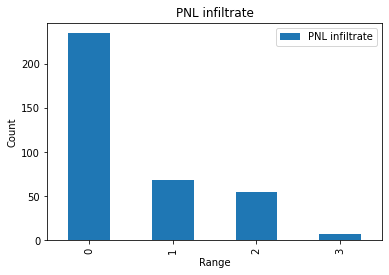

In [38]:
print('PNL infiltrate\n',new_df['PNL infiltrate'].value_counts()/len(new_df)*100)
new_df['PNL infiltrate'].value_counts().plot.bar()
plt.title('PNL infiltrate')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values PNL infiltrate .

According to Data,

- Around 64% of the patients in the data have no PNL infiltrate on the skin.

- Around 2% have severe PNL infiltrate  on the skin.

- Around 15% have intermediate PNL infiltrate on the skin.

In [39]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')

**Fibrosis of the papillary dermis**

Fibrosis is often a sequela of epidermal or dermal injury due to chronic chemical exposure or trauma. It is characterized by an increase of fibrous connective tissues in the dermis ( Figure 1. ) or subcutis and usually accompanies chronic inflammation.


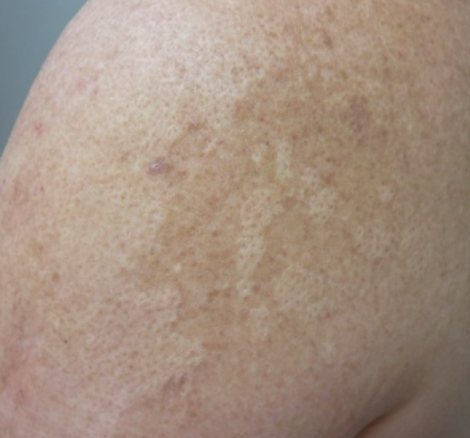


Links : https://ntp.niehs.nih.gov/nnl/integumentary/skin/fibrosis/index.htm

fibrosis of the papillary dermis
 0    85.245902
3     6.284153
2     6.284153
1     2.185792
Name: fibrosis of the papillary dermis, dtype: float64


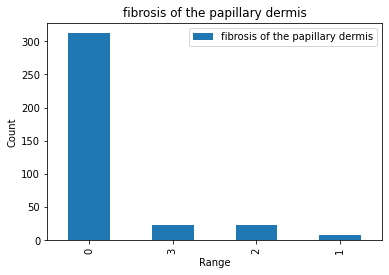

In [40]:
print('fibrosis of the papillary dermis\n',new_df['fibrosis of the papillary dermis'].value_counts()/len(new_df)*100)
new_df['fibrosis of the papillary dermis'].value_counts().plot.bar()
plt.title('fibrosis of the papillary dermis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values fibrosis of the papillary dermis .

According to Data,

- Around 85% of the patients in the data have no fibrosis of the papillary dermis on the skin.

- Around 6% have severe fibrosis of the papillary dermis on the skin.

- Around 6% have intermediate fibrosis of the papillary dermis on the skin.

**Exocytosis**

Exocytosis is infiltration of the epidermis by inflammatory or circulating blood cells.

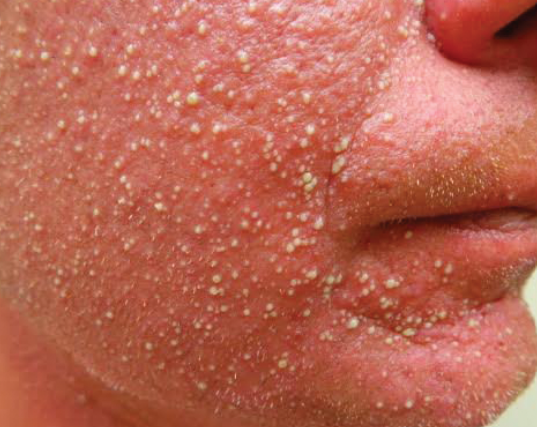

Links: https://en.wikipedia.org/wiki/Exocytosis_(dermatopathology)

Exocytosis
 2    35.245902
0    32.240437
3    16.939891
1    15.573770
Name: exocytosis, dtype: float64


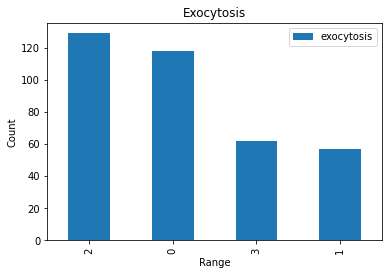

In [41]:
print('Exocytosis\n',new_df['exocytosis'].value_counts()/len(new_df)*100)
new_df['exocytosis'].value_counts().plot.bar()
plt.title('Exocytosis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Exocytosis.

According to Data,

- Around 35% of the patients  have intermediate Exocytosis on the skin.

- Around 17% have severe Exocytosis on the skin.

- Around 32% have no Exocytosis on the skin.

**Acanthosis**

Acanthosis nigricans is a skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck. Acanthosis nigricans is a condition that causes areas of dark, thick velvety skin in body folds and creases. It typically affects the armpits, groin and neck.

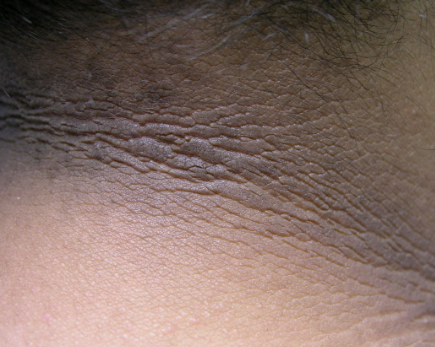

Link: https://www.mayoclinic.org/diseases-conditions/acanthosis-nigricans/symptoms-causes/syc-20368983#:~:text=Acanthosis%20nigricans%20is%20a%20skin,the%20armpits%2C%20groin%20and%20neck.

Acanthosis
 2    57.377049
3    20.491803
1    19.398907
0     2.732240
Name: acanthosis, dtype: float64


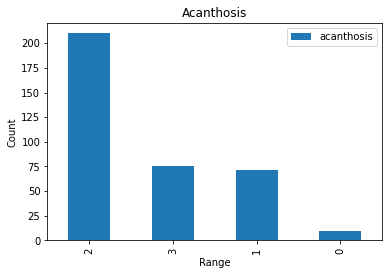

In [42]:
print('Acanthosis\n',new_df['acanthosis'].value_counts()/len(new_df)*100)
new_df['acanthosis'].value_counts().plot.bar()
plt.title('Acanthosis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Acanthosis.

According to Data,

- Around 57% of the patients have intermediate Acanthosis on the skin.

- Around 20% have severe Acanthosis on the skin.

- Around 3% have no Acanthosis on the skin.

**Hyperkeratosis**

A condition marked by thickening of the outer layer of the skin, which is made of keratin (a tough, protective protein). It can result from normal use (corns, calluses), chronic inflammation (eczema), or genetic disorders (X-linked ichthyosis, ichthyosis vulgaris).

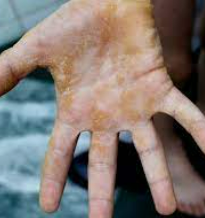


Link: https://www.cancer.gov/publications/dictionaries/cancer-terms/def/hyperkeratosis 

Hyperkeratosis
 0    62.021858
1    24.590164
2    12.021858
3     1.366120
Name: hyperkeratosis, dtype: float64


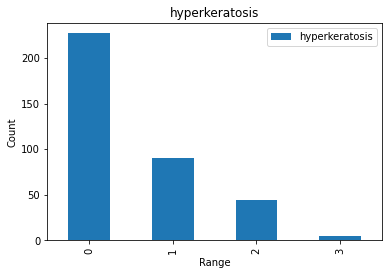

In [43]:
print('Hyperkeratosis\n',new_df['hyperkeratosis'].value_counts()/len(new_df)*100)
new_df['hyperkeratosis'].value_counts().plot.bar()
plt.title('hyperkeratosis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values hyperkeratosis.

According to Data,

- Around 62 % of the patients have no hyperkeratosis on the skin.

- Around 12% have intermediate hyperkeratosis on the skin.

- Around 1% have severe hyperkeratosis on the skin.

Parakeratosis
 2    36.065574
1    32.240437
0    23.497268
3     8.196721
Name: parakeratosis, dtype: float64


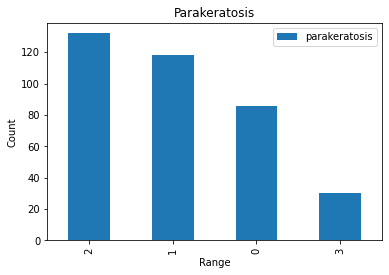

In [44]:
print('Parakeratosis\n',new_df['parakeratosis'].value_counts()/len(new_df)*100)
new_df['parakeratosis'].value_counts().plot.bar()
plt.title('Parakeratosis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Parakeratosis.

According to Data,

- Around 36 % of the patients have intermediate Parakeratosis on the skin.

- Around 23 % have no Parakeratosis on the skin.

- Around 8% have severe Parakeratosis on the skin.

Clubbing of the rete ridges
 0    68.852459
2    16.666667
3     9.289617
1     5.191257
Name: clubbing of the rete ridges, dtype: float64


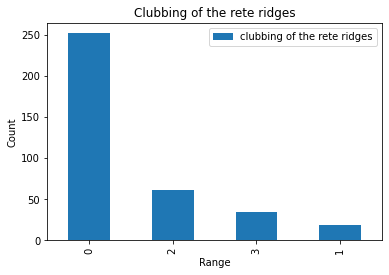

In [45]:
print('Clubbing of the rete ridges\n',new_df['clubbing of the rete ridges'].value_counts()/len(new_df)*100)
new_df['clubbing of the rete ridges'].value_counts().plot.bar()
plt.title('Clubbing of the rete ridges')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Clubbing of the rete ridges.

According to Data,

- Around 69% of the patients no Clubbing of the rete ridges on the skin.

- Around 17% have intermediate Clubbing of the rete ridges on the skin.

- Around 9% have severe Clubbing of the rete ridges on the skin.

Elongation of the rete ridges
 0    54.098361
2    25.956284
3    13.661202
1     6.284153
Name: elongation of the rete ridges, dtype: float64


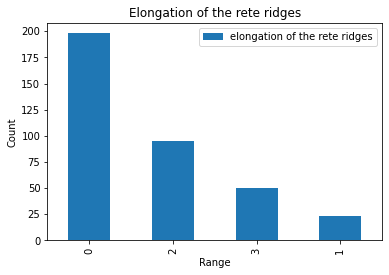

In [46]:
print('Elongation of the rete ridges\n',new_df['elongation of the rete ridges'].value_counts()/len(new_df)*100)
new_df['elongation of the rete ridges'].value_counts().plot.bar()
plt.title('Elongation of the rete ridges')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Elongation of the rete ridges.

According to Data,

- Around 54% of the patients no Elongation of the rete ridges on the skin.

- Around 26% have intermediate Elongation of the rete ridges on the skin.

- Around 14% have severe Elongation of the rete ridges on the skin.

Thinning of the suprapapillary epidermis

Thinning of the suprapapillary epidermis
 0    69.945355
2    16.393443
3     8.469945
1     5.191257
Name: thinning of the suprapapillary epidermis, dtype: float64


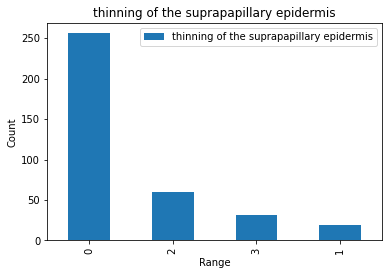

In [47]:
print('Thinning of the suprapapillary epidermis\n',new_df['thinning of the suprapapillary epidermis'].value_counts()/len(new_df)*100)
new_df['thinning of the suprapapillary epidermis'].value_counts().plot.bar()
plt.title('thinning of the suprapapillary epidermis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Thinning of the suprapapillary epidermis.

According to Data,

- Around 70% of the patients no thinning of the suprapapillary epidermis on the skin.

- Around 16% have intermediate thinning of the suprapapillary epidermis on the skin.

- Around 8% have severe thinning of the suprapapillary epidermis on the skin.

spongiform pustule
 0    80.874317
1    10.382514
2     7.103825
3     1.639344
Name: spongiform pustule, dtype: float64


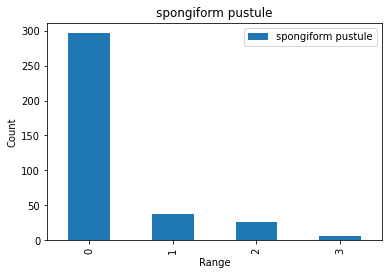

In [48]:
print('spongiform pustule\n',new_df['spongiform pustule'].value_counts()/len(new_df)*100)
new_df['spongiform pustule'].value_counts().plot.bar()
plt.title('spongiform pustule')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Thinning of the suprapapillary epidermis.

According to Data,

- Around 81% of the patients no thinning of the suprapapillary epidermis on the skin.

- Around 7% have intermediate thinning of the suprapapillary epidermis on the skin.

- Around 2% have severe thinning of the suprapapillary epidermis on the skin.

munro microabcess
 0    78.142077
1    10.109290
2     9.016393
3     2.732240
Name: munro microabcess, dtype: float64


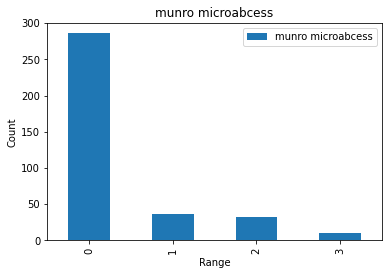

In [49]:
print('munro microabcess\n',new_df['munro microabcess'].value_counts()/len(new_df)*100)
new_df['munro microabcess'].value_counts().plot.bar()
plt.title('munro microabcess')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values munro microabcess.

According to Data,

- Around 78% of the patients no thinning of the munro microabcess on the skin.

- Around 9% have intermediate thinning of the munro microabcess on the skin.

- Around 3% have severe thinning of the munro microabcess on the skin.

focal hypergranulosis
 0    80.601093
2    11.748634
3     4.098361
1     3.551913
Name: focal hypergranulosis, dtype: float64


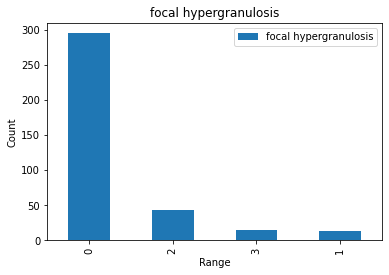

In [50]:
print('focal hypergranulosis\n',new_df['focal hypergranulosis'].value_counts()/len(new_df)*100)
new_df['focal hypergranulosis'].value_counts().plot.bar()
plt.title('focal hypergranulosis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values focal hypergranulosis.

According to Data,

- Around 81% of the patients no thinning of the focal hypergranulosis on the skin.

- Around 12% have intermediate thinning of the focal hypergranulosis on the skin.

- Around 4% have severe thinning of the focal hypergranulosis on the skin.

In [51]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')

Disappearance of the granular layer
 0    74.590164
2    13.387978
1     8.196721
3     3.825137
Name: disappearance of the granular layer, dtype: float64


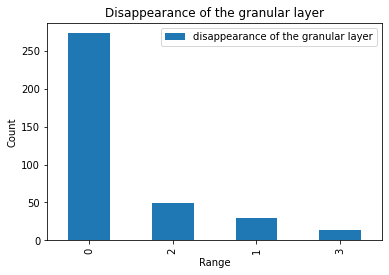

In [52]:
print('Disappearance of the granular layer\n',new_df['disappearance of the granular layer'].value_counts()/len(new_df)*100)
new_df['disappearance of the granular layer'].value_counts().plot.bar()
plt.title('Disappearance of the granular layer')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values disappearance of the granular layer.

According to Data,

- Around 76% of the patients no  disappearance of the granular layer on the skin.

- Around 13% have intermediate disappearance of the granular layer on the skin.

- Around 4% have severe  disappearance of the granular layer on the skin.

Vacuolisation and damage of basal layer
 0    80.327869
2    11.748634
3     7.103825
1     0.819672
Name: vacuolisation and damage of basal layer, dtype: float64


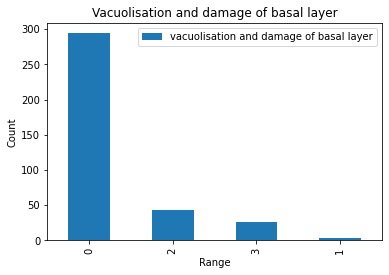

In [53]:
print('Vacuolisation and damage of basal layer\n',new_df['vacuolisation and damage of basal layer'].value_counts()/len(new_df)*100)
new_df['vacuolisation and damage of basal layer'].value_counts().plot.bar()
plt.title('Vacuolisation and damage of basal layer')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values vacuolisation and damage of basal layer.

According to Data,

- Around 80% of the patients no vacuolisation and damage of basal layer on the skin.

- Around 12% have intermediate vacuolisation and damage of basal layer on skin.

- Around 7% have severe vacuolisation and damage of basal layer on the skin.

Spongiosis
 0    54.371585
2    26.229508
3    11.748634
1     7.650273
Name: spongiosis, dtype: float64


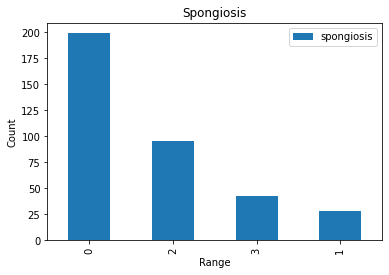

In [54]:
print('Spongiosis\n',new_df['spongiosis'].value_counts()/len(new_df)*100)
new_df['spongiosis'].value_counts().plot.bar()
plt.title('Spongiosis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Spongiosis.

According to Data,

- Around 54% of the patients no spongiosis on the skin.

- Around 26% have intermediate spongiosis on the skin.

- Around 13% have severe thinning of the Spongiosis on the skin.

Saw-tooth appearance of retes

Saw-tooth appearance of retes
 0    80.327869
2    10.928962
3     7.377049
1     1.366120
Name: saw-tooth appearance of retes, dtype: float64


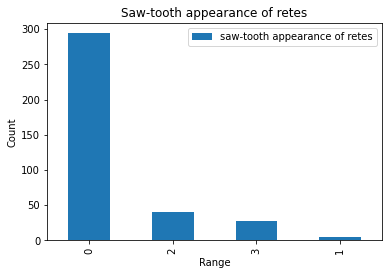

In [55]:
print('Saw-tooth appearance of retes\n',new_df['saw-tooth appearance of retes'].value_counts()/len(new_df)*100)
new_df['saw-tooth appearance of retes'].value_counts().plot.bar()
plt.title('Saw-tooth appearance of retes')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Spongiosis.

According to Data,

- Around 80% of the patients no spongiosis on the skin.

- Around 11% have intermediate spongiosis on the skin.

- Around 7% have severe thinning of the Spongiosis on the skin.

In [56]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')

**Follicular horn plug**

follicular horn plug
 0    93.989071
1     2.732240
2     2.185792
3     1.092896
Name: follicular horn plug, dtype: float64


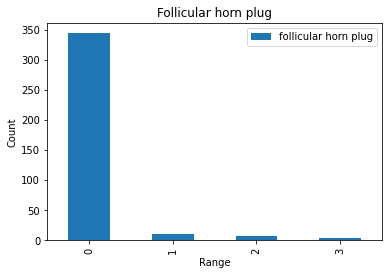

In [57]:
print('follicular horn plug\n',new_df['follicular horn plug'].value_counts()/len(new_df)*100)
new_df['follicular horn plug'].value_counts().plot.bar()
plt.title('Follicular horn plug')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values follicular horn plug.

According to Data,

- Around 94% of the patients no follicular horn plugon the skin.

- Around 2% have intermediate follicular horn plugon the skin.

- Around 1% have severe thinning of the follicular horn plug on the skin.

**Perifollicular parakeratosis**

Perifollicular parakeratosis
 0    94.262295
2     3.551913
1     1.092896
3     1.092896
Name: perifollicular parakeratosis, dtype: float64


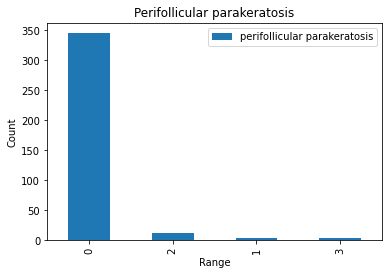

In [58]:
print('Perifollicular parakeratosis\n',new_df['perifollicular parakeratosis'].value_counts()/len(new_df)*100)
new_df['perifollicular parakeratosis'].value_counts().plot.bar()
plt.title('Perifollicular parakeratosis')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values perifollicular parakeratosis.

According to Data,

Around 94% of the patients no perifollicular parakeratosis on the skin.

Around 3% have intermediate perifollicular parakeratosis on the skin.

Around 1% have severe perifollicular parakeratosis on the skin.

**Inflammatory monoluclear inflitrate**

Inflammatory monoluclear inflitrate
 2    56.284153
1    23.224044
3    16.939891
0     3.551913
Name: inflammatory monoluclear inflitrate, dtype: float64


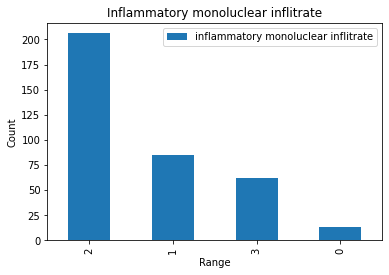

In [59]:
print('Inflammatory monoluclear inflitrate\n',new_df['inflammatory monoluclear inflitrate'].value_counts()/len(new_df)*100)
new_df['inflammatory monoluclear inflitrate'].value_counts().plot.bar()
plt.title('Inflammatory monoluclear inflitrate')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values inflammatory monoluclear inflitrate.

According to Data,

Around 56% of the patients intermediate inflammatory monoluclear inflitrate on the skin.

Around 3% have no inflammatory monoluclear inflitrate on the skin.

Around 23% have severe inflammatory monoluclear inflitrate on the skin.

**Band-like infiltrate**

Band-like infiltrate
 0    78.961749
3    14.207650
2     6.010929
1     0.819672
Name: band-like infiltrate, dtype: float64


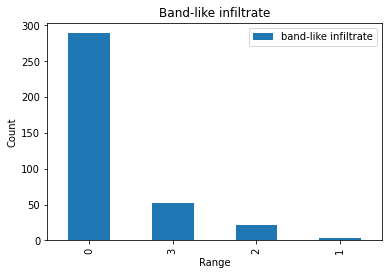

In [60]:
print('Band-like infiltrate\n',new_df['band-like infiltrate'].value_counts()/len(new_df)*100)
new_df['band-like infiltrate'].value_counts().plot.bar()
plt.title('Band-like infiltrate')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values Band-like infiltrate.

According to Data,

Around 79% of the patients no Band-like infiltrate on the skin.

Around 14% have sever Band-like infiltrate on the skin.

Around 6% have intermediate Band-like infiltrate on the skin.

**Age**

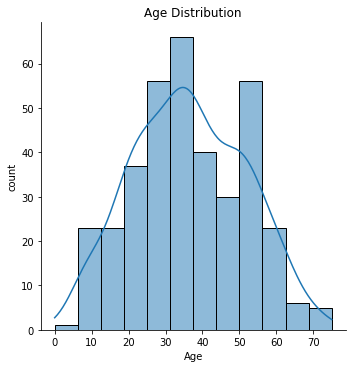

In [61]:
sns.displot(data=new_df, x = 'Age' , kde=True)
plt.title('Age Distribution')
plt.ylabel('count')
plt.show()

The above displot chart shows the distribution of the count of Age.

According to Data,

The distribution of the Age shows gaussian distribution(Bell-like curve)

In [62]:
df['Age'].describe()

count     366
unique     61
top        40
freq       17
Name: Age, dtype: object

In [63]:
new_df['Age'].mean(axis = 0)  # mean is a average of all the age values

36.30054644808743

In [64]:
new_df['Age'].std(axis = 0) # std(standard deviation) tells about the spread of the data 

15.155896713161793

**Target**



Target
 1    30.601093
3    19.672131
2    16.666667
5    14.207650
4    13.387978
6     5.464481
Name: target, dtype: float64


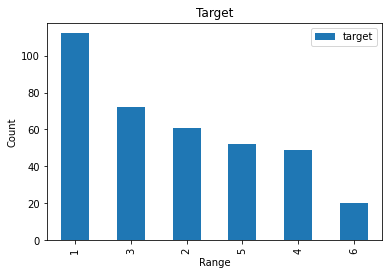

In [65]:
print('Target\n',new_df['target'].value_counts()/len(new_df)*100)
new_df['target'].value_counts().plot.bar()
plt.title('Target')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of each range of values of Target.

According to Data,

- Around 31% of data have 1st type disease.
- Around 17% of data have 2nd type disease.
- Around 20% of data have 3rd type disease.
- Around 13% of data have 4th type disease.
- Around 14% of data have 5th type disease.
- Around 5% of data  have 6th type disease.

Bi-Variate Analysis

In [66]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')

**Erythema Vs Age**

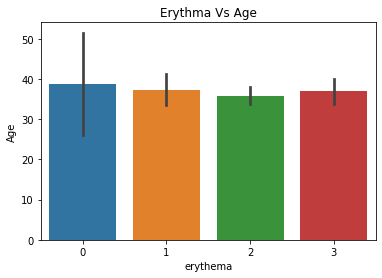

In [67]:
sns.barplot(x='erythema',y='Age',data=new_df) 
plt.title('Erythma Vs Age')
plt.show()

The above barplot shows the Erythma with respective to Age.

According to data,
-People with no erythma has age around 39.
-People with severe erythma has age around 38.

Hence, Age is not a factor which influence Erythma. Erythmatic condition can happen at any age. 

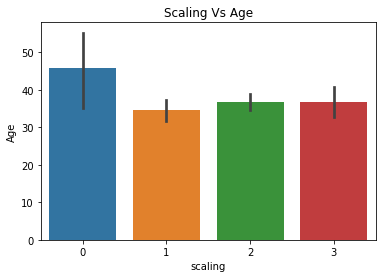

In [68]:
sns.barplot(x='scaling',y='Age',data=new_df) 
plt.title('Scaling Vs Age')
plt.show()

**Scaling Vs Age**

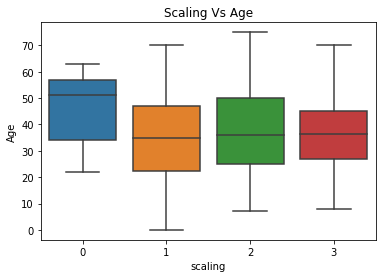

In [69]:
sns.boxplot(x='scaling',y='Age',data=new_df );
plt.title('Scaling Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Scaling.

According to the Data,

The people who have no scaling condition on their body have age around 53. 

The people who have severe scaling condition have age around 35.


According to NIH, the scaling increase with the age. There are other factors which increase the scaling in the body are sun exposure, eating habits, smoking etc.

Hence, the data is contradicting the fact.


Link: https://www.nia.nih.gov/health/skin-care-and-aging





Definite borders Vs Age

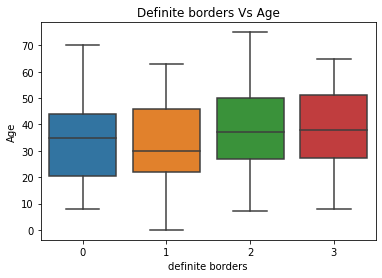

In [70]:
sns.boxplot(x='definite borders',y='Age',data=new_df );
plt.title('Definite borders Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Scaling.

According to the Data,

- The IQR range of no definite borders in the skin is from 20 to 45.
- The IQR range of sever definite borders in the skin is from 25 to 48.

Itching Vs Age

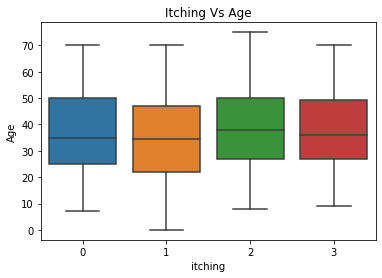

In [71]:
sns.boxplot(x='itching',y='Age',data=new_df );
plt.title('Itching Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Itching.

According to the Data,

- The IQR range of no Itching in the skin is from 25 to 50.
- The IQR range of severe Itching in the skin is from 28 to 48.

Koebner phenomenon Vs Age

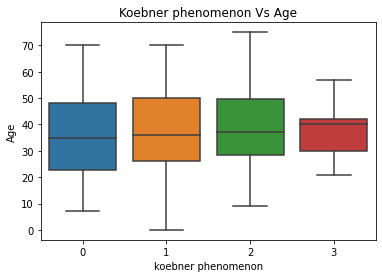

In [72]:
sns.boxplot(x='koebner phenomenon',y='Age',data=new_df );
plt.title('Koebner phenomenon Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Itching.

According to the Data,

- The people who have no itching on the body are have equdistant IQR range.

- The people who have severe ictching problems between 50 percentile to 75 percentile are very less.

Polygonal Papules Vs Age

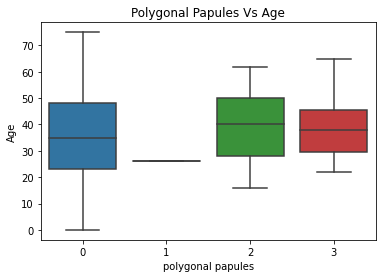

In [73]:
sns.boxplot(x='polygonal papules',y='Age',data=new_df );
plt.title('Polygonal Papules Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Polygonal Papules.

According to the Data,

- The people who have no Polygonal Papules on the body have have IQR range from 23 to 48 age.

- The people who have severe Polygonal Papules on the body have IQR range from 28 to 35 age

Follicular papules Vs Age

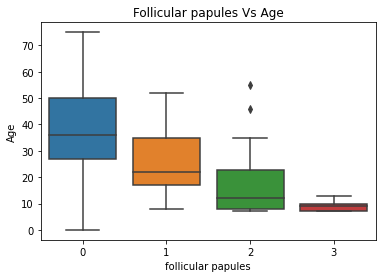

In [74]:
sns.boxplot(x='follicular papules',y='Age',data=new_df );
plt.title('Follicular papules Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Follicular papules.

According to the Data,

- The people who have no Follicular papules on the body have have IQR range from 28 to 50 age.

- The people who have severe Follicular papules on the body have IQR range from 8 to 12 age. It seems that the problem comes to young children than adults

**Oral mucosal involvement Vs Age**

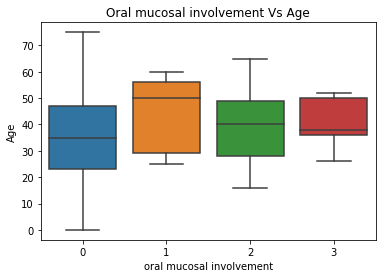

In [75]:
sns.boxplot(x='oral mucosal involvement',y='Age',data=new_df );
plt.title('Oral mucosal involvement Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to oral mucosal involvement.

According to the Data,
- The people who have no oral mucosal involvement have IQR range from 23 to 48 age.

- The people have severe oral mucosal invlolvement are more in between 50 percentile to 75 percentile which is from 37 to 49 age.

**Knee and elbow involvement Vs Age**

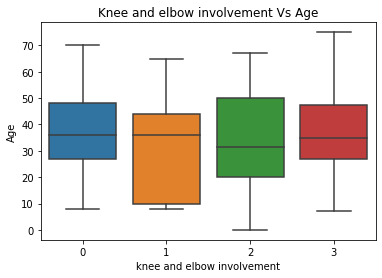

In [76]:
sns.boxplot(x='knee and elbow involvement',y='Age',data=new_df );
plt.title('Knee and elbow involvement Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Knee and elbow involvement.

According to the Data,
- The people who have no Knee and elbow involvement have IQR from 28 to 48 age.

- The people have severe Knee and elbow involvement have IQR from 28 to 47 age.

**Thinning of the Suprapapillary Epidermis Vs Age**

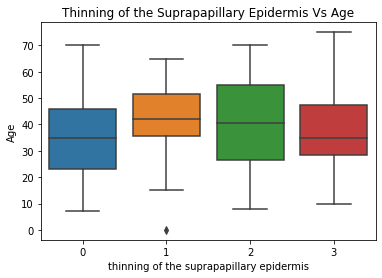

In [77]:
sns.boxplot(x='thinning of the suprapapillary epidermis',y='Age',data=new_df );
plt.title('Thinning of the Suprapapillary Epidermis Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Thinning of the suprapapillary epidermis.

According to the Data,
- The people who have no Thinning of the suprapapillary epidermis have IQR from 23 to 46 age.

- The people have severe Thinning of the suprapapillary epidermis have IQR from 28 to 29 age.

**Spongiform Pustule Vs Age**

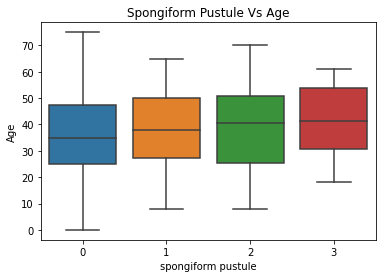

In [78]:
sns.boxplot(x='spongiform pustule',y='Age',data=new_df );
plt.title('Spongiform Pustule Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Spongiform pustule.

According to the Data,
- The people who have no Spongiform pustule have IQR from 28 to 26 age.

- The people have severe Spongiform pustule have IQR from 30 to 51 age.

**Munro Microabcess Vs Age**

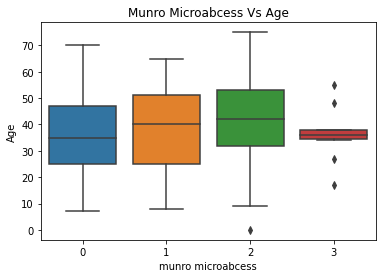

In [79]:
sns.boxplot(x='munro microabcess',y='Age',data=new_df );
plt.title('Munro Microabcess Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Munro microabcess.

According to the Data,
- The people who have no Munro microabcess have IQR from 27 to 48 age.

- The people have severe Munro microabcess have IQR from 36 to 38 age.

**Focal Hypergranulosis Vs Age**

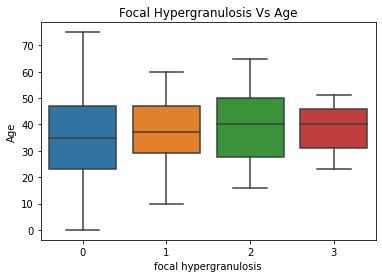

In [80]:
sns.boxplot(x='focal hypergranulosis',y='Age',data=new_df );
plt.title('Focal Hypergranulosis Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Focal hypergranulosis.

According to the Data,
- The people who have no focal hypergranulosis have IQR from 23 to 48 age.

- The people have severe focal hypergranulosis have IQR from 31 to 45 age.

**Disappearance of the Granular Layer Vs Age**

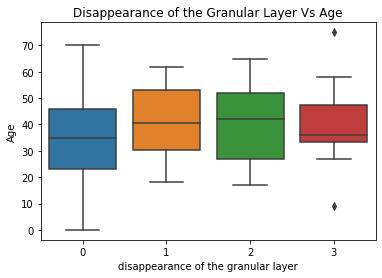

In [81]:
sns.boxplot(x='disappearance of the granular layer',y='Age',data=new_df );
plt.title('Disappearance of the Granular Layer Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Disappearance of the Granular Layer.

According to the Data,
- The people who have no Disappearance of the Granular Layer have IQR from 22 to 45 age.

- The people have severe Disappearance of the Granular Layer have IQR from 35 to 46 age.

**Vacuolisation and Damage of Basal Layer**

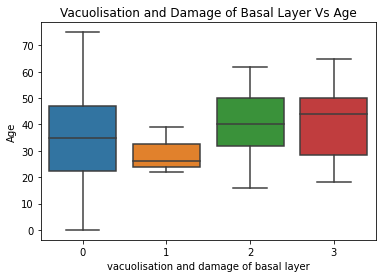

In [82]:
sns.boxplot(x='vacuolisation and damage of basal layer',y='Age',data=new_df );
plt.title('Vacuolisation and Damage of Basal Layer Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Disappearance of the Granular Layer.

According to the Data,
- The people who have no Disappearance of the Granular Layer have IQR from 22 to 48 age.

- The people have severe Disappearance of the Granular Layer have IQR from 29 to 49 age.

**Spongiosis**

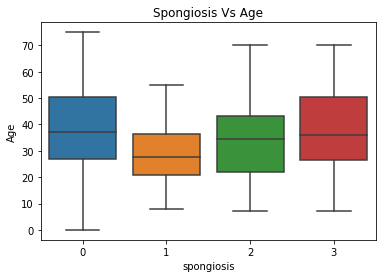

In [83]:
sns.boxplot(x='spongiosis',y='Age',data=new_df );
plt.title('Spongiosis Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Spongiosis.

According to the Data,
- The people who have no Spongiosis have IQR from 28 to 50 age.

- The people have severe Spongiosis have IQR from 28 to 49 age.

**Saw-Tooth Appearance of Retes**

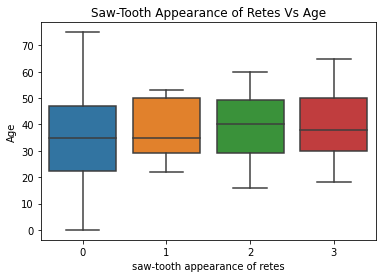

In [84]:
sns.boxplot(x='saw-tooth appearance of retes',y='Age',data=new_df );
plt.title('Saw-Tooth Appearance of Retes Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Saw-Tooth Appearance of Retes.

According to the Data,
- The people who have no Saw-Tooth Appearance of Retes have IQR from 22 to 48 age.

- The people have severe Saw-Tooth Appearance of Retes have IQR from 32 to 49 age.

**Follicular Horn Plug**

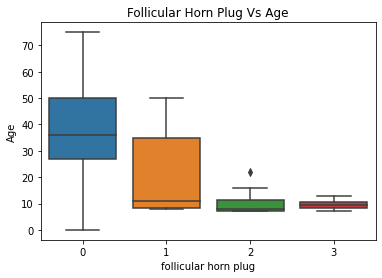

In [85]:
sns.boxplot(x='follicular horn plug',y='Age',data=new_df );
plt.title('Follicular Horn Plug Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Follicular Horn Plug.

According to the Data,
- The people who have no Follicular Horn Plug have IQR from 28 to 50 age.

- The people have severe Follicular Horn Plug have IQR from 9 to 11 age.

**Perifollicular Parakeratosis**

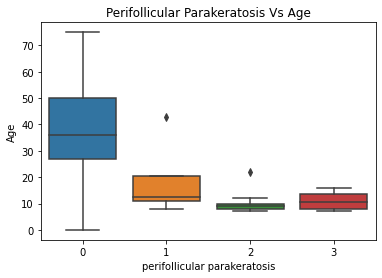

In [86]:
sns.boxplot(x='perifollicular parakeratosis',y='Age',data=new_df );
plt.title('Perifollicular Parakeratosis Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Perifollicular Parakeratosis.

According to the Data,
- The people who have no Perifollicular Parakeratosis have IQR from 28 to 50 age.

- The people have severe Perifollicular Parakeratosis have IQR from 10 to 47 age.

**Inflammatory Monoluclear Inflitrate**

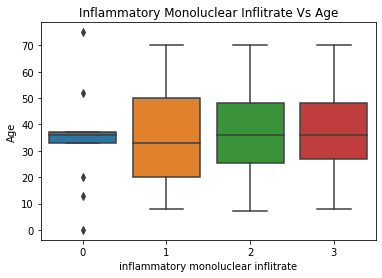

In [87]:
sns.boxplot(x='inflammatory monoluclear inflitrate',y='Age',data=new_df );
plt.title('Inflammatory Monoluclear Inflitrate Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Inflammatory Monoluclear Inflitrate.

According to the Data,
- The people who have no Inflammatory Monoluclear Inflitrate have IQR from 33 to 38 age.

- The people have severe Inflammatory Monoluclear Inflitrate have IQR from 29 to 49 age.

**Band-Like Infiltrate**

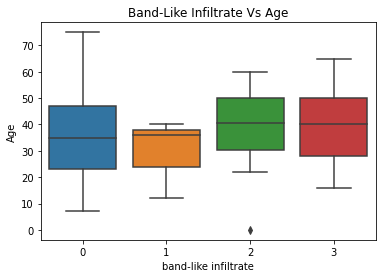

In [88]:
sns.boxplot(x='band-like infiltrate',y='Age',data=new_df );
plt.title('Band-Like Infiltrate Vs Age')
plt.show()

The Boxplot shows the Age distribution with respect to Band-Like Infiltrate.

According to the Data,
- The people who have no Band-Like Infiltrate have IQR from 22 to 48 age.

- The people have severe Band-Like Infiltrate have IQR from 29 to 50 age.

In [89]:
new_df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'target'],
      dtype='object')

In [90]:
new_df.target.value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: target, dtype: int64

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
scaler.fit(new_df.drop('target', axis = 1))
X = scaler.transform(new_df.drop('target', axis = 1))
y = new_df.target

In [99]:
pd.Series(y_res).value_counts()

2    112
1    112
3    112
5    112
4    112
6    112
Name: target, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = 42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [100]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [102]:
y_train.value_counts()

5    86
2    83
1    82
4    80
6    71
3    68
Name: target, dtype: int64

In [95]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9653465346534653

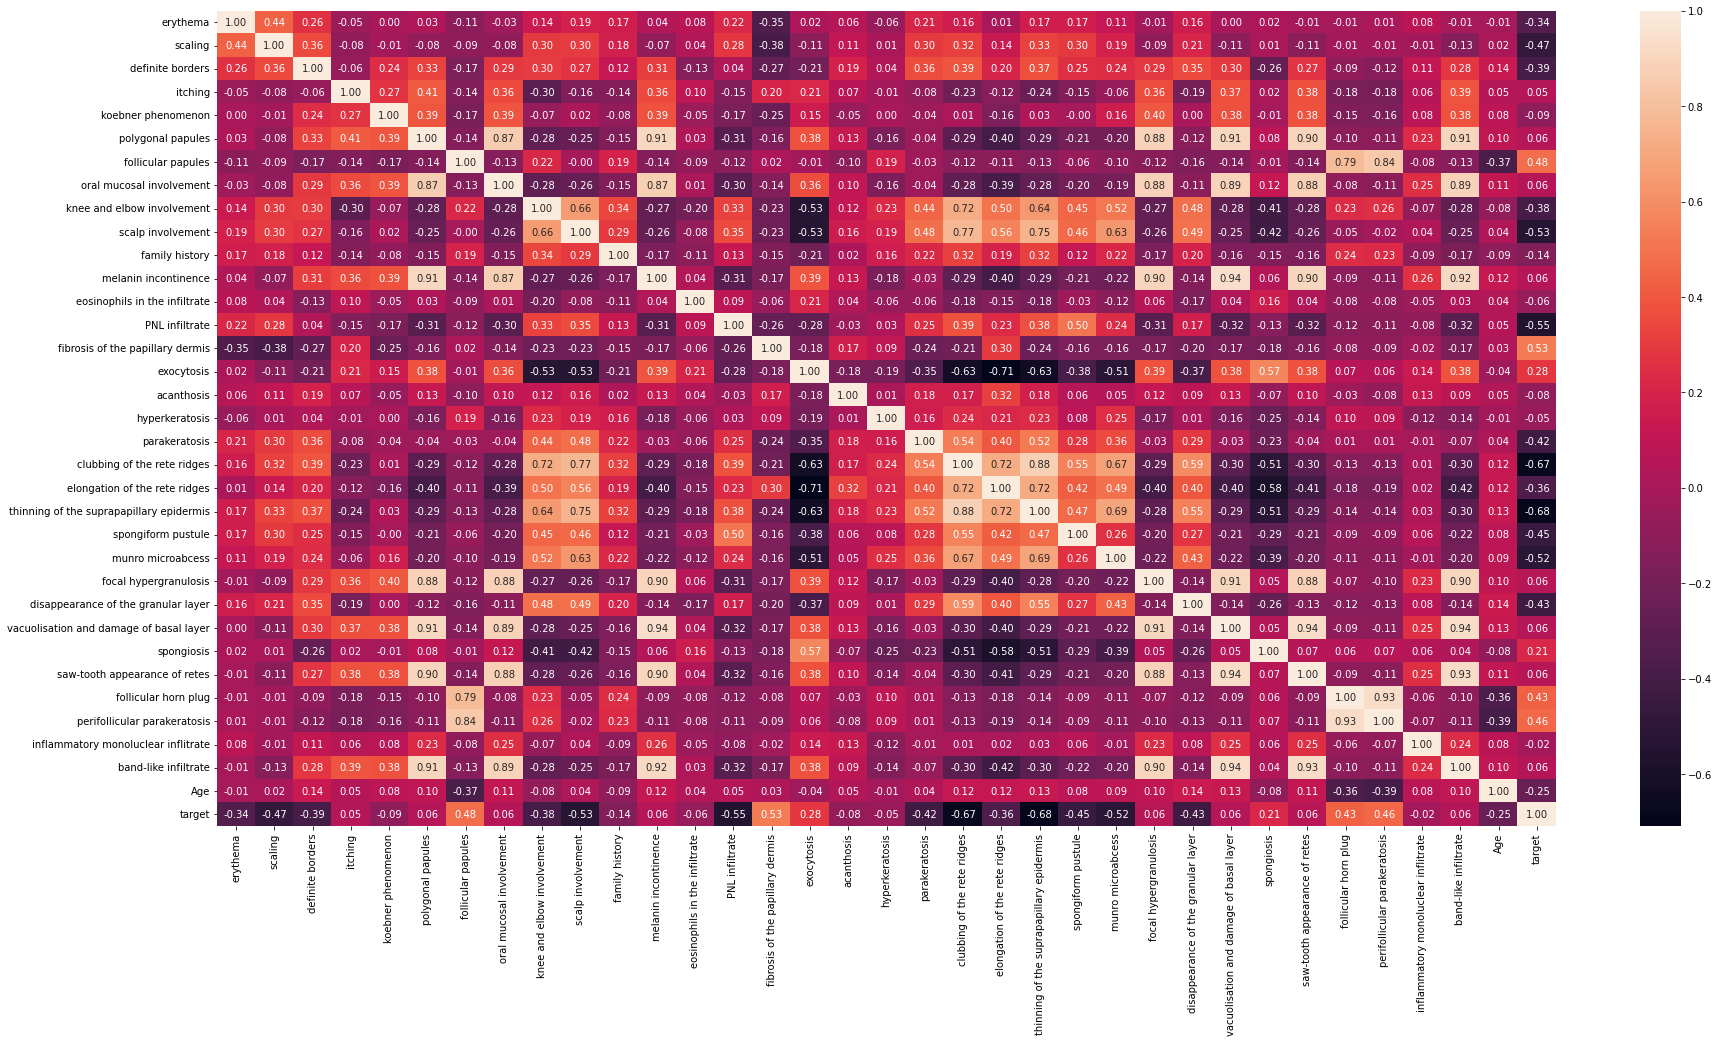

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 15))
sns.heatmap(new_df.corr(), fmt='.2f', annot=True)
plt.show()